In [57]:
import nltk

nltk.download("inaugural")
from nltk.corpus import inaugural

TARGET_PRESIDENT = "Monroe"
NON_TARGET_PRESIDENT = "Obama"


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [58]:
presidents = set([fileid[5:-4] for fileid in inaugural.fileids()])
president_data_dict = {}

for index, president in enumerate(presidents):
    speeches = [inaugural.sents(file_id) for file_id in inaugural.fileids() if president in file_id]
    sent_num = len([sent for speech in speeches for sent in speech])
    president_data_dict[president] = sent_num

sorted_dict: dict[str, int] = dict(
    sorted(president_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, president_item in enumerate(sorted_dict.items()):
    print(f"#{idx + 1}: {president_item[0]} - {president_item[1]} sentences")

#1: Harrison - 367 sentences
#2: Bush - 337 sentences
#3: Roosevelt - 308 sentences
#4: Reagan - 253 sentences
#5: Monroe - 251 sentences
#6: McKinley - 230 sentences
#7: Eisenhower - 215 sentences
#8: Obama - 204 sentences
#9: Coolidge - 197 sentences
#10: Clinton - 193 sentences
#11: Nixon - 175 sentences
#12: Biden - 170 sentences
#13: Lincoln - 165 sentences
#14: Taft - 159 sentences
#15: Hoover - 158 sentences
#16: Polk - 153 sentences
#17: Harding - 149 sentences
#18: Wilson - 128 sentences
#19: Truman - 116 sentences
#20: Garfield - 112 sentences
#21: Adams - 111 sentences
#22: Pierce - 104 sentences
#23: Cleveland - 102 sentences
#24: VanBuren - 95 sentences
#25: Johnson - 94 sentences
#26: Trump - 90 sentences
#27: Buchanan - 89 sentences
#28: Jefferson - 87 sentences
#29: Grant - 85 sentences
#30: Hayes - 59 sentences
#31: Jackson - 55 sentences
#32: Madison - 54 sentences
#33: Carter - 53 sentences
#34: Kennedy - 52 sentences
#35: Washington - 28 sentences
#36: Taylor - 22 s

In [59]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")

nontarget_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if NON_TARGET_PRESIDENT in file_id
]
target_speeches = [
    inaugural.sents(file_id) for file_id in inaugural.fileids() if TARGET_PRESIDENT in file_id
]

nontarget_sents = [sent for speech in nontarget_speeches for sent in speech]
target_sents = [sent for speech in target_speeches for sent in speech]

for sent in nontarget_sents[:50]:
    print(" ".join(sent))
print(f"...\n\nSpeaker: President {NON_TARGET_PRESIDENT}, {len(nontarget_sents)} sentences")

My fellow citizens :
I stand here today humbled by the task before us , grateful for the trust you have bestowed , mindful of the sacrifices borne by our ancestors .
I thank President Bush for his service to our nation , as well as the generosity and cooperation he has shown throughout this transition .
Forty - four Americans have now taken the presidential oath .
The words have been spoken during rising tides of prosperity and the still waters of peace .
Yet , every so often the oath is taken amidst gathering clouds and raging storms .
At these moments , America has carried on not simply because of the skill or vision of those in high office , but because We the People have remained faithful to the ideals of our forbearers , and true to our founding documents .
So it has been .
So it must be with this generation of Americans .
That we are in the midst of crisis is now well understood .
Our nation is at war , against a far - reaching network of violence and hatred .
Our economy is badl

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [60]:
for sent in target_sents[:50]:
    print(" ".join(sent))

print(f"...\n\nSpeaker: President {TARGET_PRESIDENT}, {len(target_sents)} sentences")

I should be destitute of feeling if I was not deeply affected by the strong proof which my fellow - citizens have given me of their confidence in calling me to the high office whose functions I am about to assume .
As the expression of their good opinion of my conduct in the public service , I derive from it a gratification which those who are conscious of having done all that they could to merit it can alone feel .
MY sensibility is increased by a just estimate of the importance of the trust and of the nature and extent of its duties , with the proper discharge of which the highest interests of a great and free people are intimately connected .
Conscious of my own deficiency , I cannot enter on these duties without great anxiety for the result .
From a just responsibility I will never shrink , calculating with confidence that in my best efforts to promote the public welfare my motives will always be duly appreciated and my conduct be viewed with that candor and indulgence which I have

In [61]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for sent in nontarget_sents + target_sents:
    all_tags.update(fc.all_pos_frequency(sent).keys())

print(all_tags)


{'NNS', 'VBN', 'EX', 'RBS', '(', ':', 'VBG', 'WP$', 'PDT', 'NN', ',', '.', 'WP', 'DT', '$', 'NNPS', 'VBP', 'NNP', 'VB', 'RB', 'RP', 'WDT', 'JJR', 'RBR', 'POS', 'VBZ', 'PRP$', "''", 'SYM', 'JJ', 'PRP', 'MD', 'WRB', 'JJS', 'VBD', 'TO', 'CC', 'IN', 'CD'}


In [62]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for b_sent in nontarget_sents:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_sent in target_sents:
    x, y = dg.generate_dataset_sent(b_sent, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))


,word variation,uncommon word frequency,sentence length,average word length,NNS,VBN,EX,RBS,(,:,...,JJ,PRP,MD,WRB,JJS,VBD,TO,CC,IN,CD
0,1.000000,1.000000,4,4.250000,0.250000,0.000000,0.0,0.0,0.0,0.250000,...,0.250000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.857143,0.571429,28,4.178571,0.035714,0.035714,0.0,0.0,0.0,0.000000,...,0.000000,0.035714,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035714,0.000000
2,0.960000,0.560000,25,4.560000,0.000000,0.040000,0.0,0.0,0.0,0.000000,...,0.000000,0.040000,0.0,0.0,0.0,0.0,0.040000,0.040000,0.040000,0.000000
3,1.000000,0.727273,11,4.636364,0.000000,0.090909,0.0,0.0,0.0,0.090909,...,0.090909,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.090909
4,0.941176,0.588235,17,4.470588,0.058824,0.058824,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.058824,0.117647,0.000000
5,1.000000,0.750000,16,4.187500,0.062500,0.062500,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.062500,0.000000,0.000000
6,0.795455,0.500000,44,4.227273,0.022727,0.022727,0.0,0.0,0.0,0.000000,...,0.022727,0.022727,0.0,0.0,0.0,0.0,0.045455,0.022727,0.022727,0.000000
7,1.000000,0.400000,5,2.400000,0.000000,0.200000,0.0,0.0,0.0,0.000000,...,0.000000,0.200000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.000000
8,1.000000,0.500000,10,4.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.100000,0.1,0.0,0.0,0.0,0.000000,0.000000,0.100000,0.000000
9,1.000000,0.461538,13,3.615385,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.076923,0.0,0.0,0.0,0.0,0.000000,0.000000,0.076923,0.000000


In [63]:
print(df.dtypes)


word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
NNS                        float64
VBN                        float64
EX                         float64
RBS                        float64
(                          float64
:                          float64
VBG                        float64
WP$                        float64
PDT                        float64
NN                         float64
,                          float64
.                          float64
WP                         float64
DT                         float64
$                          float64
NNPS                       float64
VBP                        float64
NNP                        float64
VB                         float64
RB                         float64
RP                         float64
WDT                        float64
JJR                        float64
RBR                        float64
POS                 

In [64]:
print(df.isna().sum())

word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
NNS                        0
VBN                        0
EX                         0
RBS                        0
(                          0
:                          0
VBG                        0
WP$                        0
PDT                        0
NN                         0
,                          0
.                          0
WP                         0
DT                         0
$                          0
NNPS                       0
VBP                        0
NNP                        0
VB                         0
RB                         0
RP                         0
WDT                        0
JJR                        0
RBR                        0
POS                        0
VBZ                        0
PRP$                       0
''                         0
SYM                        0
JJ                         0
PRP           

In [65]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")


auc-rocスコア: 0.8377262623054939


In [66]:
display(pd.crosstab(y_test, y_pred))


col_0,False,True
row_0,,
False,34,13
True,18,49


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


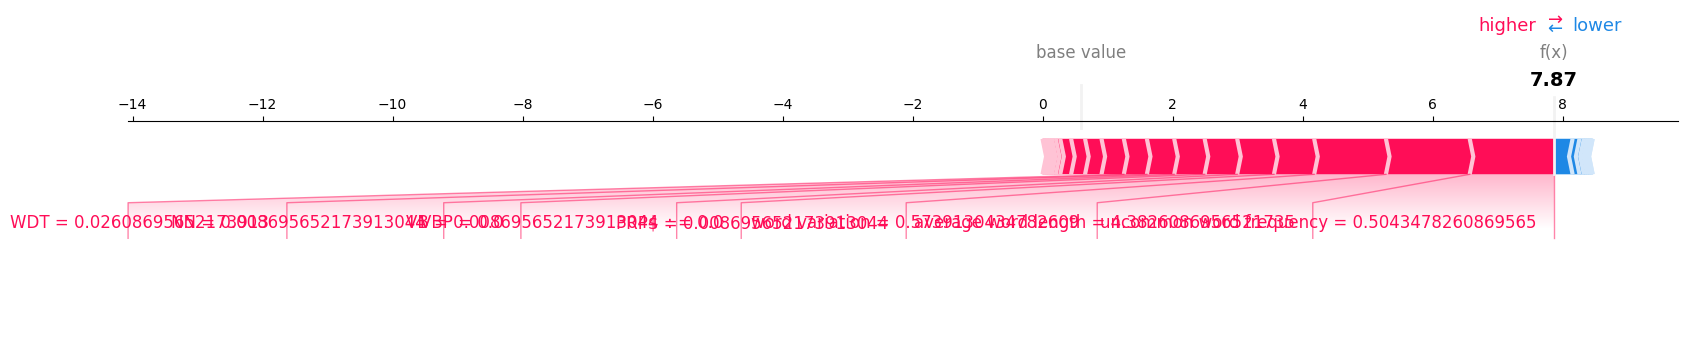

In [67]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

# shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0], matplotlib=True)


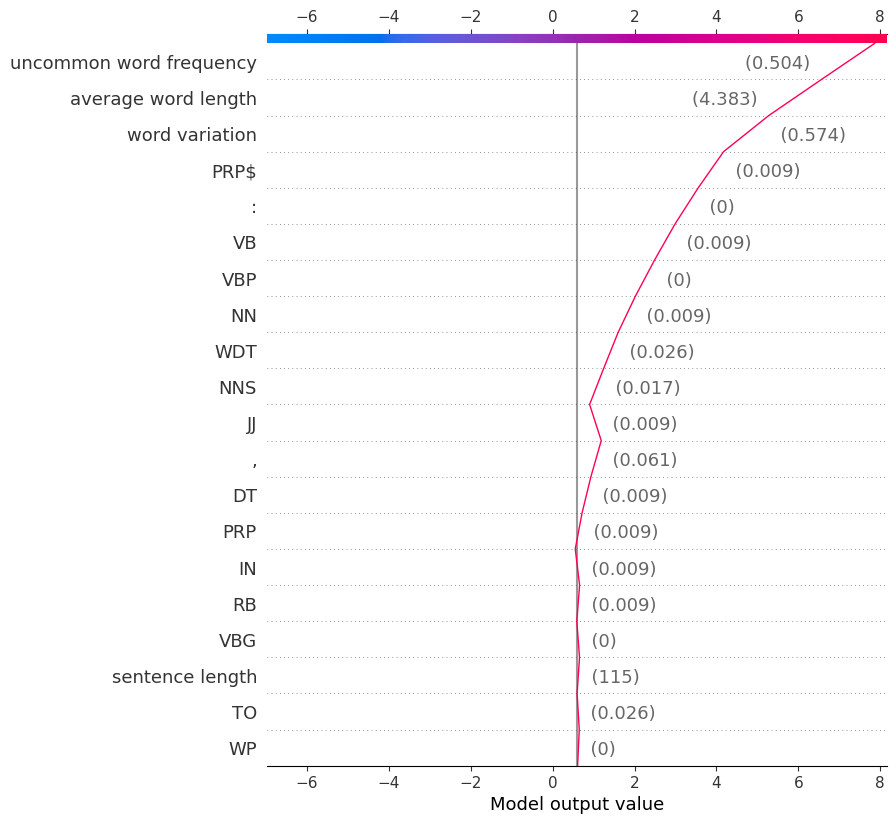

In [68]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


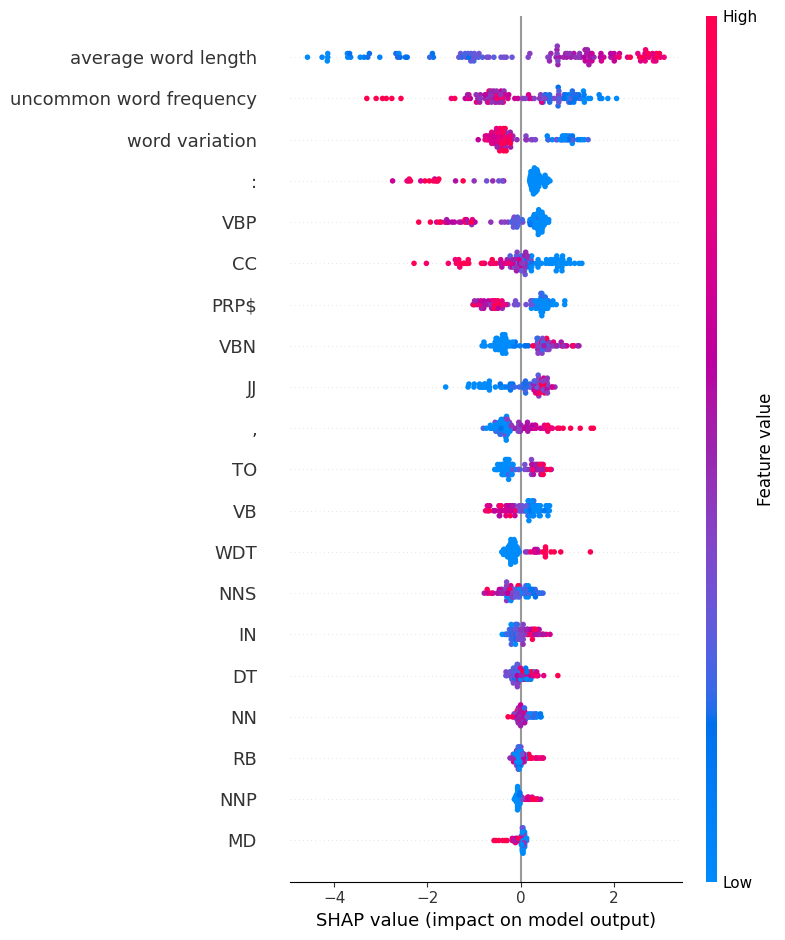

In [69]:
shap.summary_plot(sv_test, X_test)


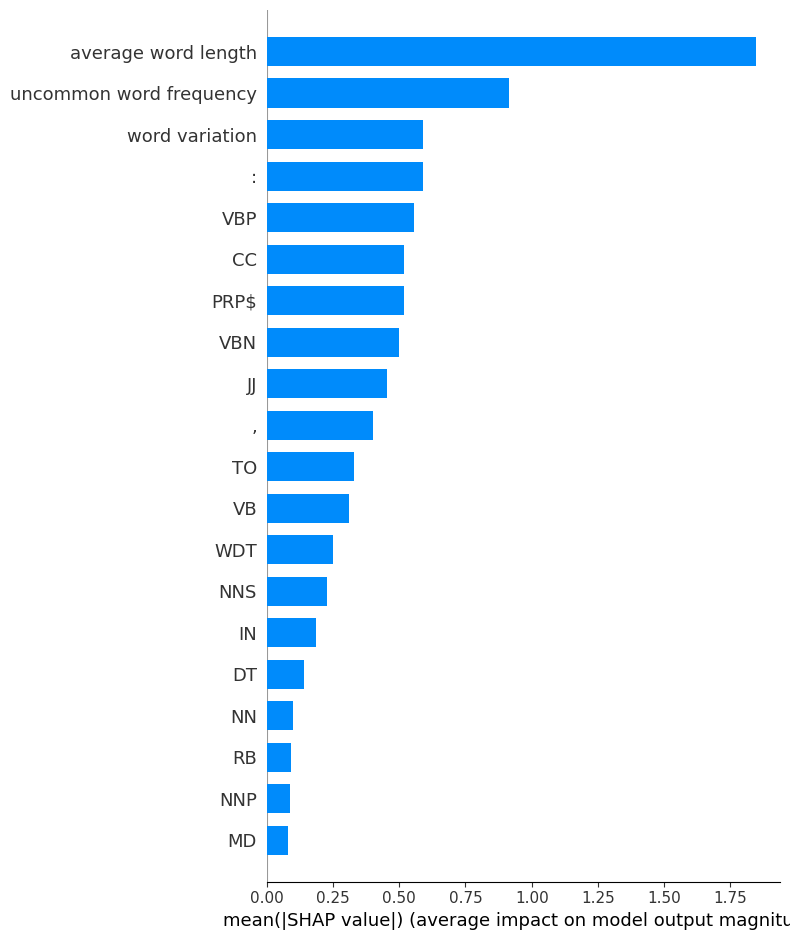

In [70]:
shap.summary_plot(sv_test, X_test, plot_type="bar")
